In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

pd.options.display.max_rows = 50
pd.options.display.max_columns = 50

### Simple Linear Regression

In [29]:
# import cars data
cars = pd.read_csv(r"Cars93.csv")

In [30]:
cars.head()

,Unnamed: 0,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,4,1.8,140,6300,2890,Yes,13.2,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,6,3.2,200,5500,2335,Yes,18.0,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,6,2.8,172,5500,2280,Yes,16.9,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,6,2.8,172,5500,2535,Yes,21.1,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,4,3.5,208,5700,2545,Yes,21.1,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [31]:
cars[['Weight','MPG.highway']].corr()

,Weight,MPG.highway
Weight,1.000000,-0.810658
MPG.highway,-0.810658,1.000000


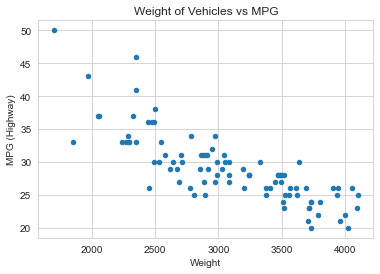

In [32]:
# create a scatterplot of weight and mpg highway

sns.set_style("whitegrid")

ax = cars.plot(title = 'Weight of Vehicles vs MPG', kind='scatter', x='Weight',y='MPG.highway')
ax.set_xlabel('Weight')
ax.set_ylabel('MPG (Highway)')
plt.show()

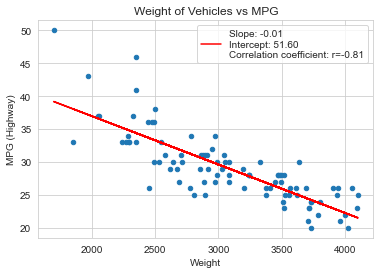

In [33]:
# use pandas.plot() to plot weight vs mpg
# use scipy.stats to run linear regression

# Set up axis values
x = cars['Weight'].to_numpy()
y = cars['MPG.highway'].to_numpy()

ax = cars.plot(title = 'Weight of Vehicles vs MPG', kind='scatter', x='Weight',y='MPG.highway')

# Set up axis labels
ax.set_xlabel('Weight')
ax.set_ylabel('MPG (Highway)')

# Calculate linear regression
slope, intercept, r, p, stderr = scipy.stats.linregress(x,y)

# Display factors
line = f'Slope: {slope:.2f}\nIntercept: {intercept:.2f}\nCorrelation coefficient: r={r:.2f}'

# Add the slope line
ax.plot(x, intercept + slope * x, label=line, color="r")

# Set up the legend
ax.legend(facecolor='white')

## Multiple Linear Regression

### [1] Import the raw data set into a Pandas DataFrame.

### [2] Clean the data and remove missing values. Drop any column that is not categorical or numeric. Let our target variable be MPG.highway again. Separate the independent variables from the dependent variable.

In [34]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          93 non-null     int64  
 1   Manufacturer        93 non-null     object 
 2   Model               93 non-null     object 
 3   Type                93 non-null     object 
 4   Min.Price           93 non-null     float64
 5   Price               93 non-null     float64
 6   Max.Price           93 non-null     float64
 7   MPG.city            93 non-null     int64  
 8   MPG.highway         93 non-null     int64  
 9   AirBags             93 non-null     object 
 10  DriveTrain          93 non-null     object 
 11  Cylinders           93 non-null     object 
 12  EngineSize          93 non-null     float64
 13  Horsepower          93 non-null     int64  
 14  RPM                 93 non-null     int64  
 15  Rev.per.mile        93 non-null     int64  
 16  Man.trans.

In [35]:
cars.head()

,Unnamed: 0,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,4,1.8,140,6300,2890,Yes,13.2,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,6,3.2,200,5500,2335,Yes,18.0,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,6,2.8,172,5500,2280,Yes,16.9,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,6,2.8,172,5500,2535,Yes,21.1,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,4,3.5,208,5700,2545,Yes,21.1,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'Min.Price'}>,
        <AxesSubplot:title={'center':'Price'}>,
        <AxesSubplot:title={'center':'Max.Price'}>],
       [<AxesSubplot:title={'center':'MPG.city'}>,
        <AxesSubplot:title={'center':'MPG.highway'}>,
        <AxesSubplot:title={'center':'EngineSize'}>,
        <AxesSubplot:title={'center':'Horsepower'}>],
       [<AxesSubplot:title={'center':'RPM'}>,
        <AxesSubplot:title={'center':'Rev.per.mile'}>,
        <AxesSubplot:title={'center':'Fuel.tank.capacity'}>,
        <AxesSubplot:title={'center':'Passengers'}>],
       [<AxesSubplot:title={'center':'Length'}>,
        <AxesSubplot:title={'center':'Wheelbase'}>,
        <AxesSubplot:title={'center':'Width'}>,
        <AxesSubplot:title={'center':'Turn.circle'}>],
       [<AxesSubplot:title={'center':'Rear.seat.room'}>,
        <AxesSubplot:title={'center':'Luggage.room'}>,
        <AxesSubplot:title={'center':'Weight'}>, <

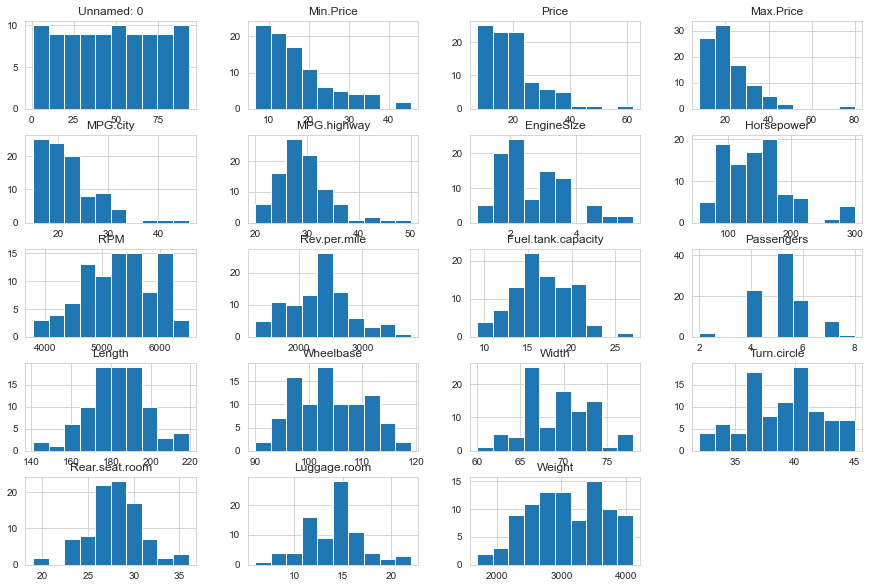

In [36]:
cars.hist(figsize = (15,10))

In [37]:
# check what kind of na values are in the luggage and rear seat room columns
cars[(cars["Rear.seat.room"].isna()) | (cars["Luggage.room"].isna())]

,Unnamed: 0,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
15,16,Chevrolet,Lumina_APV,Van,14.7,16.3,18.0,18,23,None,Front,6,3.8,170,4800,1690,No,20.0,7,178,110,74,44,30.5,NaN,3715,USA,Chevrolet Lumina_APV
16,17,Chevrolet,Astro,Van,14.7,16.6,18.6,15,20,None,4WD,6,4.3,165,4000,1790,No,27.0,8,194,111,78,42,33.5,NaN,4025,USA,Chevrolet Astro
18,19,Chevrolet,Corvette,Sporty,34.6,38.0,41.5,17,25,Driver only,Rear,8,5.7,300,5000,1450,Yes,20.0,2,179,96,74,43,NaN,NaN,3380,USA,Chevrolet Corvette
25,26,Dodge,Caravan,Van,13.6,19.0,24.4,17,21,Driver only,4WD,6,3.0,142,5000,1970,No,20.0,7,175,112,72,42,26.5,NaN,3705,USA,Dodge Caravan
35,36,Ford,Aerostar,Van,14.5,19.9,25.3,15,20,Driver only,4WD,6,3.0,145,4800,2080,Yes,21.0,7,176,119,72,45,30.0,NaN,3735,USA,Ford Aerostar
55,56,Mazda,MPV,Van,16.6,19.1,21.7,18,24,None,4WD,6,3.0,155,5000,2240,No,19.6,7,190,110,72,39,27.5,NaN,3735,non-USA,Mazda MPV
56,57,Mazda,RX-7,Sporty,32.5,32.5,32.5,17,25,Driver only,Rear,rotary,1.3,255,6500,2325,Yes,20.0,2,169,96,69,37,NaN,NaN,2895,non-USA,Mazda RX-7
65,66,Nissan,Quest,Van,16.7,19.1,21.5,17,23,None,Front,6,3.0,151,4800,2065,No,20.0,7,190,112,74,41,27.0,NaN,4100,non-USA,Nissan Quest
69,70,Oldsmobile,Silhouette,Van,19.5,19.5,19.5,18,23,None,Front,6,3.8,170,4800,1690,No,20.0,7,194,110,74,44,30.5,NaN,3715,USA,Oldsmobile Silhouette
86,87,Toyota,Previa,Van,18.9,22.7,26.6,18,22,Driver only,4WD,4,2.4,138,5000,2515,Yes,19.8,7,187,113,71,41,35.0,NaN,3785,non-USA,Toyota Previa


In [38]:
# impute mean values in rear seat room and luggage room columns
# create dataframe with imputed mean values for numeric columns

# separate numeric columns into new dataframe
int_cols = ['Rear.seat.room', 'Luggage.room']
int_df = cars[int_cols]

# initialize imputer and impute dataframe
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
int_array = imp.fit_transform(int_df)

# create dataframe from array with original columns
int_df_imp = pd.DataFrame(data = int_array, columns = int_cols)

In [39]:
# drop luggage and rear seat columns from cars df and add in the imputed version
# also drop unneccesary unnamed column
cars.drop(['Rear.seat.room', 'Luggage.room', 'Unnamed: 0'], axis=1, inplace=True)

# concat int and cat dataframe back together to get imputed dataframe 
imputed_cars = pd.concat([cars, int_df_imp], axis =1)

### [3] Generate dummy variables for the categorical features.

In [44]:
# create dummies for categorical columns
cat_cols = ['Manufacturer', 'Model', 'Type', 'AirBags', 'DriveTrain', 'Cylinders', 'Man.trans.avail', 'Origin', 'Make']

# create list of dummy dataframes
dummy_list = []
for cat in cat_cols:
    dummy_list.append(pd.get_dummies(imputed_cars[cat], drop_first=True))

# append imputed_cars to dummy_list for concatenation
dummy_list.append(imputed_cars)

# drop original categorical columns from imputed_cars
imputed_cars.drop(cat_cols, axis=1, inplace=True)

# concat dummy columns back in to imputed_cars
cars_clean = pd.concat(dummy_list, axis=1)

In [51]:
# check cars_clean df
cars_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Columns: 249 entries, Audi to Luggage.room
dtypes: float64(7), int64(11), uint8(231)
memory usage: 34.2 KB


### [4] Create a training set that's 75% of your data set and a complementary test set with the remaining 25%. Specify random_state=0.

In [54]:
# create train and test arrays

# select columns to model with
model_df = cars_clean.drop(["MPG.highway"], axis=1)

# select target column
target_col = cars_clean["MPG.highway"]

X_train, X_test, y_train, y_test = train_test_split(model_df, target_col, test_size=0.25, random_state=0)

### [5] Train the model using the LinearRegression class. Leave all parameters at their default values.

In [76]:
# train model
reg = LinearRegression().fit(X_train, y_train)

In [78]:
# test model against training data
reg.score(X_train, y_train)

1.0

In [93]:
# print coefficients
coefficients = reg.coef_

In [92]:
# print intercept
intercept = reg.intercept_

### [6] Use your model to generate predictions on the test set, then create two scatter plots: one with predicted values against actual values, and another with residuals against predicted values. Print the coefficient of determination of the model with the .score() method.

In [81]:
# predict test values
reg.predict(X_test)


array([26.77159774, 35.94729481, 24.23916316, 19.70821244, 27.45393049,
       26.8681179 , 35.02167329, 32.99627962, 28.62427369, 28.11946107,
       34.42979252, 25.39695667, 24.32932606, 27.2263661 , 34.8161056 ,
       30.17839192, 27.27364997, 35.0197269 , 30.73012772, 26.36268332,
       27.84297901, 31.70366368, 28.32896571, 27.87282556])

In [82]:
# actual test values
list(y_test)

[26,
 33,
 24,
 20,
 28,
 26,
 33,
 34,
 29,
 26,
 38,
 25,
 25,
 26,
 33,
 26,
 27,
 33,
 31,
 28,
 27,
 31,
 27,
 28]

In [83]:
# print coeffcient of determination
reg.score(X_test, y_test)

0.822392427978703

Text(0.5, 1.0, 'Predicted vs Actual')

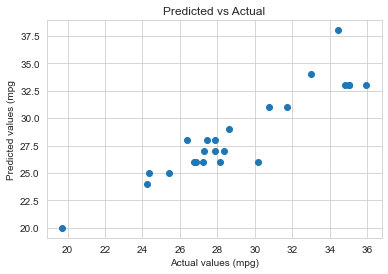

In [88]:
# create a scatterplot of predicted values vs actual values

yvals = np.array(y_test)
xvals = np.array(reg.predict(X_test))
plt.scatter(xvals, yvals)
# add a label to the x axis
plt.xlabel('Actual values (mpg)')
# add a label to the y axis
plt.ylabel('Predicted values (mpg')
# add a title
plt.title('Predicted vs Actual')

Text(0.5, 1.0, 'Predicted vs Residuals')

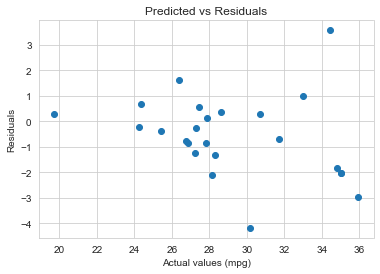

In [89]:
# create a scatterplot of predicted values vs residuals
prediction = reg.predict(X_test)
yvals = np.array(y_test - prediction)
xvals = np.array(reg.predict(X_test))
plt.scatter(xvals, yvals)
# add a label to the x axis
plt.xlabel('Actual values (mpg)')
# add a label to the y axis
plt.ylabel('Residuals')
# add a title
plt.title('Predicted vs Residuals')

### [7] Print out the actual model in equation form, i.e., y = b + c1x1 + c2x2 + c3x3 + ....

In [97]:
equation = f"y = {round(intercept, 2)} + "

for i in range(len(coefficients)):
    equation += f"{round(coefficients[i],2)}x{i+1} + "
    

print(equation[:-2])

y = 8.92 + 0.14x1 + 0.6x2 + 0.5x3 + 0.56x4 + 0.62x5 + -0.04x6 + -0.7x7 + -0.41x8 + -0.68x9 + -0.62x10 + 0.37x11 + -0.01x12 + 0.0x13 + -0.35x14 + -0.45x15 + 0.32x16 + 0.83x17 + 0.3x18 + -0.2x19 + -0.2x20 + -0.45x21 + -0.13x22 + 0.24x23 + 0.65x24 + -0.0x25 + -0.0x26 + -0.37x27 + -0.09x28 + -0.16x29 + 0.56x30 + -0.11x31 + 0.85x32 + -0.11x33 + -0.56x34 + 0.11x35 + 0.6x36 + 0.24x37 + 0.0x38 + 0.0x39 + -0.0x40 + -0.0x41 + -0.3x42 + 0.38x43 + -0.24x44 + 0.0x45 + 0.42x46 + -0.0x47 + -0.14x48 + 0.0x49 + -0.25x50 + -0.35x51 + 1.06x52 + 0.13x53 + 0.5x54 + -0.32x55 + -0.0x56 + -0.04x57 + 0.32x58 + -0.21x59 + 0.37x60 + -0.08x61 + -0.2x62 + 0.01x63 + 0.0x64 + -0.04x65 + -0.2x66 + 0.0x67 + -0.09x68 + 0.4x69 + 0.17x70 + 0.32x71 + -0.32x72 + 0.0x73 + 0.0x74 + 0.14x75 + 0.31x76 + -0.38x77 + -0.21x78 + -0.38x79 + -0.16x80 + 0.24x81 + -0.49x82 + 0.84x83 + 0.0x84 + 0.25x85 + -0.35x86 + -0.46x87 + -0.23x88 + -0.26x89 + 0.0x90 + 0.0x91 + 0.45x92 + 0.0x93 + 0.0x94 + 0.78x95 + 0.3x96 + -0.06x97 + -1.13x98 + 0.